In [1]:
import os

os.chdir(r'C:\Users\caroline.ohagan\Documents\INTERN_PROJECT_2024\DATA\SST')

In [2]:
os.chdir(r'C:\users\caroline.OHagan\Downloads')
%run ./startup_file.ipynb #run startup file and install libraries if necessary

# SST TIMESERIES

## Author: caroline OHagan

##### *Last run on 2024-07-26*

In [3]:
import wget

In [23]:
start_date = '20230101' #(yyyy-mm-dd format)
end_date = '20231231'
proj_data = '/SST' #name of project
data_dir_fold = data_dir+proj_data #path for new folder 
os.chdir(data_dir_fold)
fname = "/DD1_" + start_date + '_'+ end_date + ".nc" #create unique filename 
#follow kims naming structure 
#DD8_yyyymmdd_yyyymmdd start end dates #write function to get that parts of URL 
sst_file = data_dir_fold+fname

url = ''.join(['https://comet.nefsc.noaa.gov/erddap/griddap/noaa_coastwatch_acspo_v2_reanalysis.nc?sea_surface_temperature%5B('+start_date+'T12:00:00Z):1:('+end_date+'T12:00:00Z)%5D%5B(34.40918):1:(46.362305)%5D%5B(-63.585942):1:(-77.681645)%5D'
               ]) 

def url2date(url, nu): #write function to grab the start and end dates of the data inquiry to use them for naming our data file
    dat = url.split('(')
    s_dat = [s for s in dat if nu in s]
    s_dat = s_dat[0].split('T')
    s_dat = s_dat[0].split('-')
    s_dat = s_dat[0]+s_dat[1]+s_dat[2]
   
    return(s_dat)

ds_source = xr.open_dataset(sst_file, decode_cf=True)

In [25]:
proj_data = '/SEASCAPES' #name of project
data_dir_fold = data_dir+proj_data #path for new folder 
os.chdir(data_dir_fold)
fname = "/DD8_" + start_date + '_'+ end_date + ".nc" #create unique filename 
#follow kims naming structure 
#DD8_yyyymmdd_yyyymmdd start end dates #write function to get that parts of URL 
file = data_dir_fold+fname
seascapes = xr.open_dataset(file, decode_cf=True) #open nc file 

ds_source = xr.open_dataset(sst_file, decode_cf=True) #open nc file 
ds_source #inspect xarray dataset
ds_target = xr.open_dataset(file, decode_cf=True) #open nc file 
ds_target #inspect xarray dataset
eightday=ds_source.rolling(time=8, center=True, min_periods=1).mean()
import xarray_regrid
ds_source = eightday.regrid.linear(ds_target) #regrid data 

In [26]:
num_files = len(seascapes.CLASS.values)

In [27]:
# CREATE DICTIONARIES OF MASKS
masks = {}
mask_one = []

for y in range(1,34):
    mask_one = []
    for x in range(num_files):
        cn= np.ma.masked_where(seascapes.CLASS.values[x]==y, seascapes.CLASS.values[x])
        mask_one.append(cn)
        masks.update({y: mask_one})

In [28]:
from scipy import stats

In [29]:
# CREATE DICTIONARIES OF PERCENTS
avgs = []
averages = {}
se = []
std_err = {}
for y in range(1,34):
    avgs = []
    se = []
    for x in range(num_files):
        me = np.nanmean(ds_source.sea_surface_temperature.values[x][masks[y][x].mask])
        xx = stats.sem(ds_source.sea_surface_temperature.values[x][masks[y][x].mask][~np.isnan(ds_source.sea_surface_temperature.values[x][masks[y][x].mask])])
        se.append(xx)
        std_err.update({y:se})
        avgs.append(me)
        averages.update({y:avgs})

In [30]:
#this turns the datetimes into strings and splits them into yyyy-mm-dd for labeling the date axis 
#add this BEFORE plot
d8s = []
month = []

for x in range(len(seascapes.time.data)):
    d88 = str(seascapes.time.data[x])
    d88 = d88.split('T')
    d8s.append(d88[0])
    M = seascapes.time[x].dt.strftime('%B').item()
    month.append(M)

In [31]:
xi = list(range(len(seascapes.time)))

In [32]:
final_se = []
for x in range(1,34):
    se= stats.sem(averages[x])
    final_se.append(se)

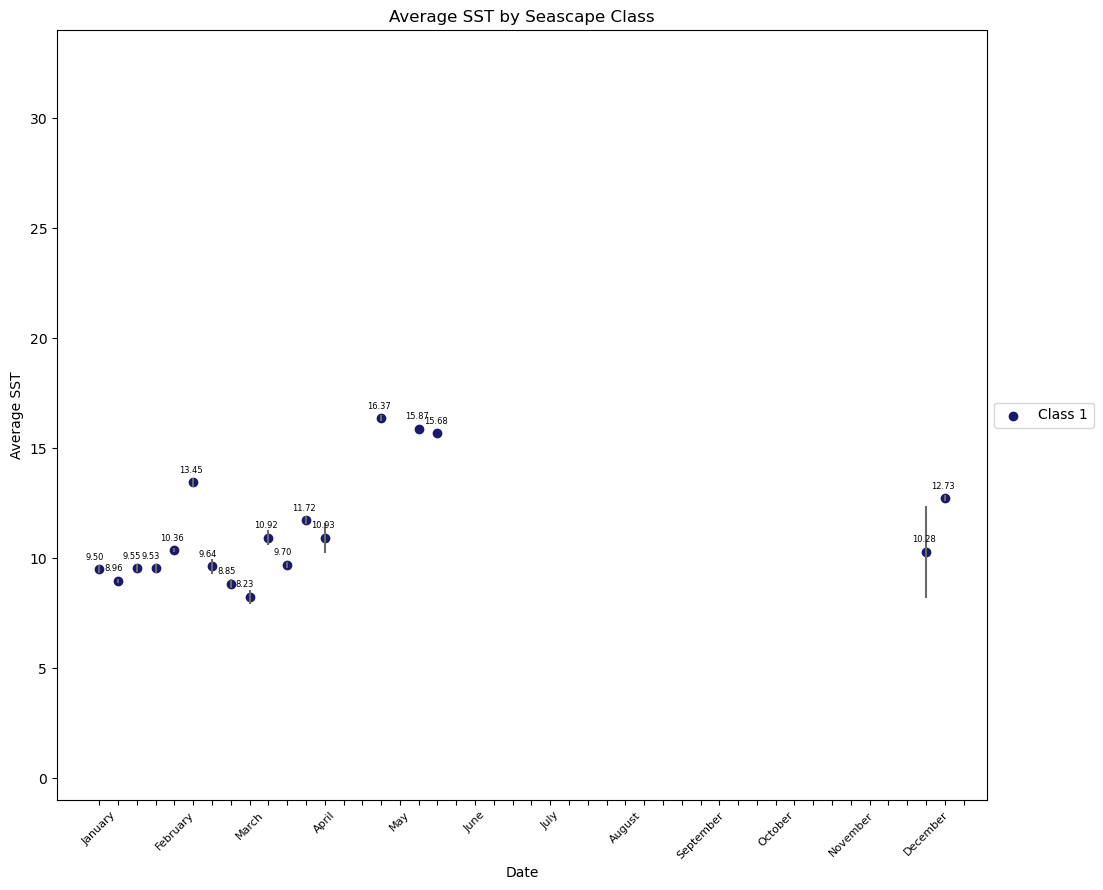

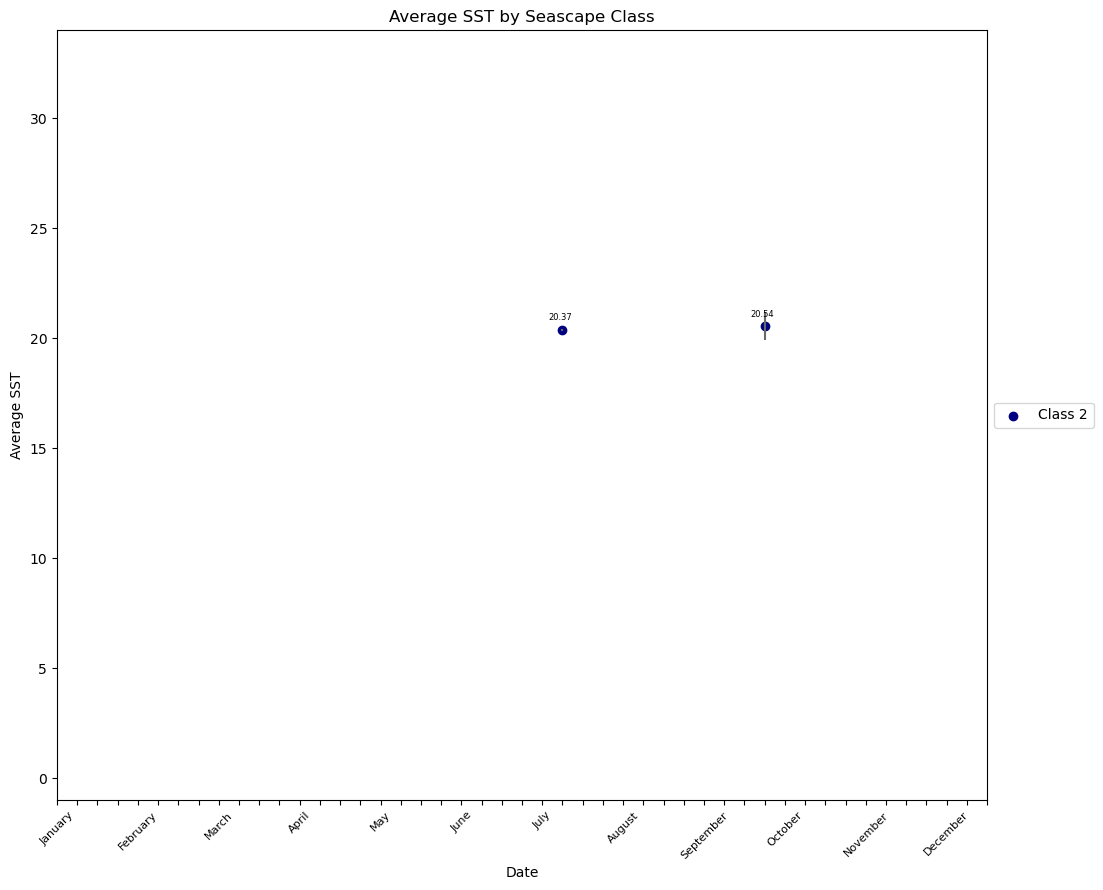

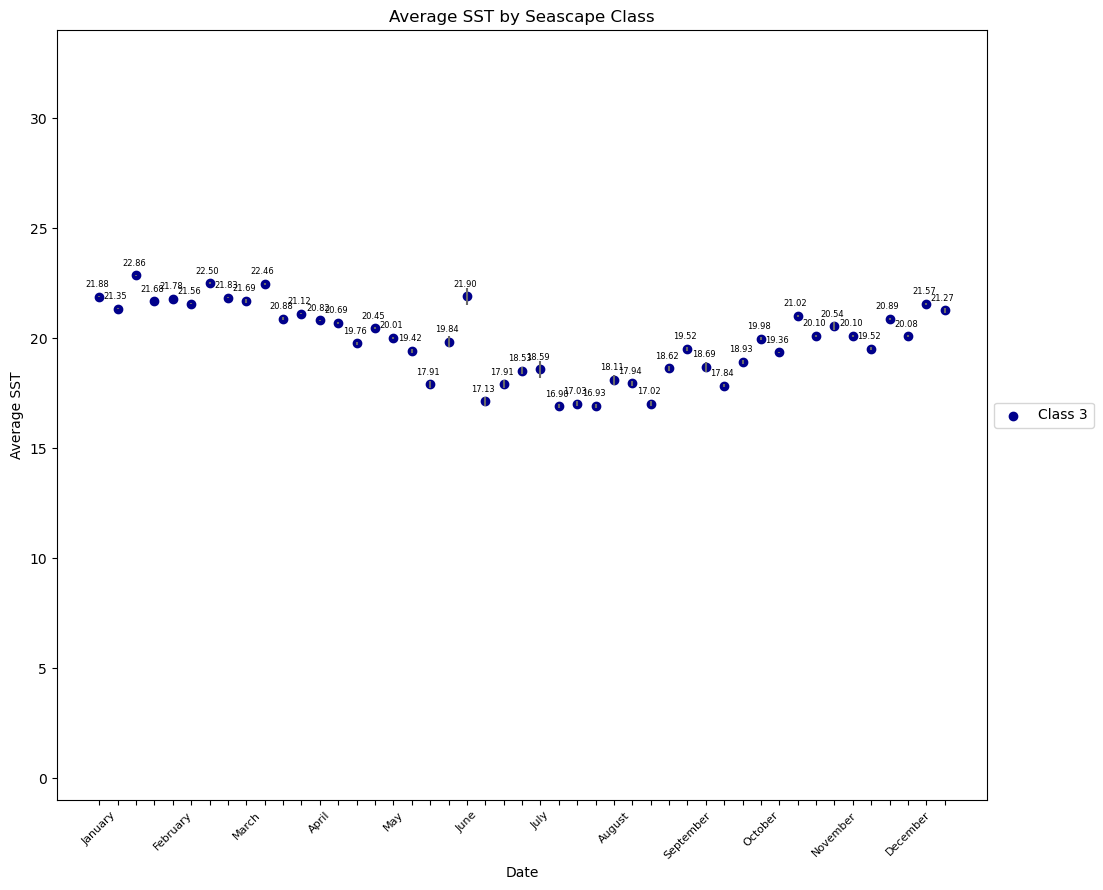

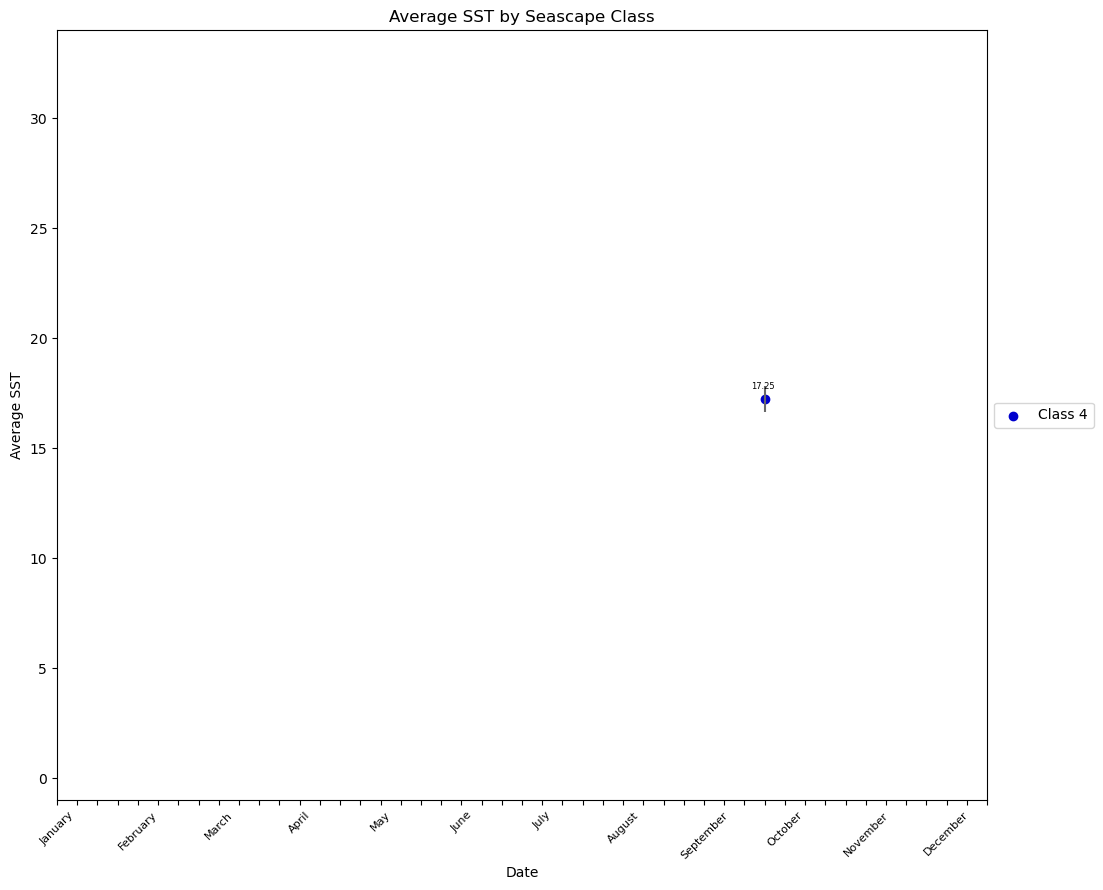

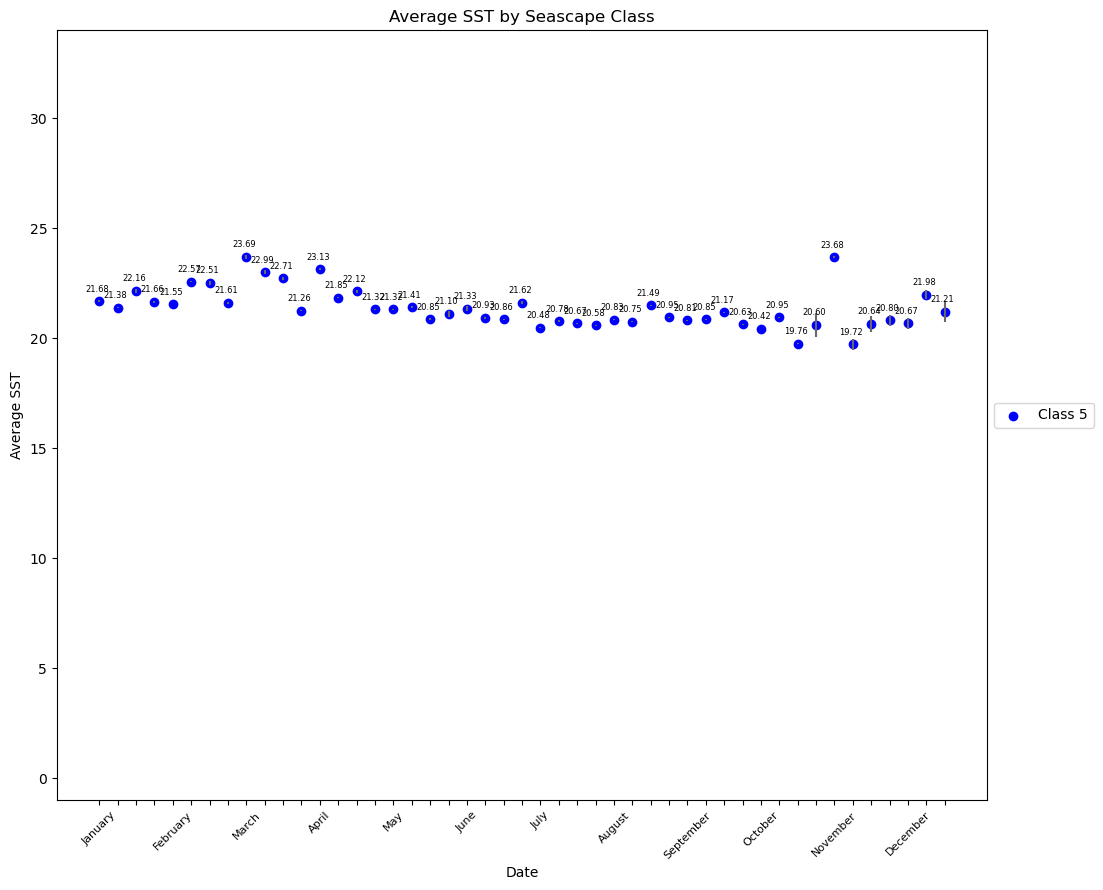

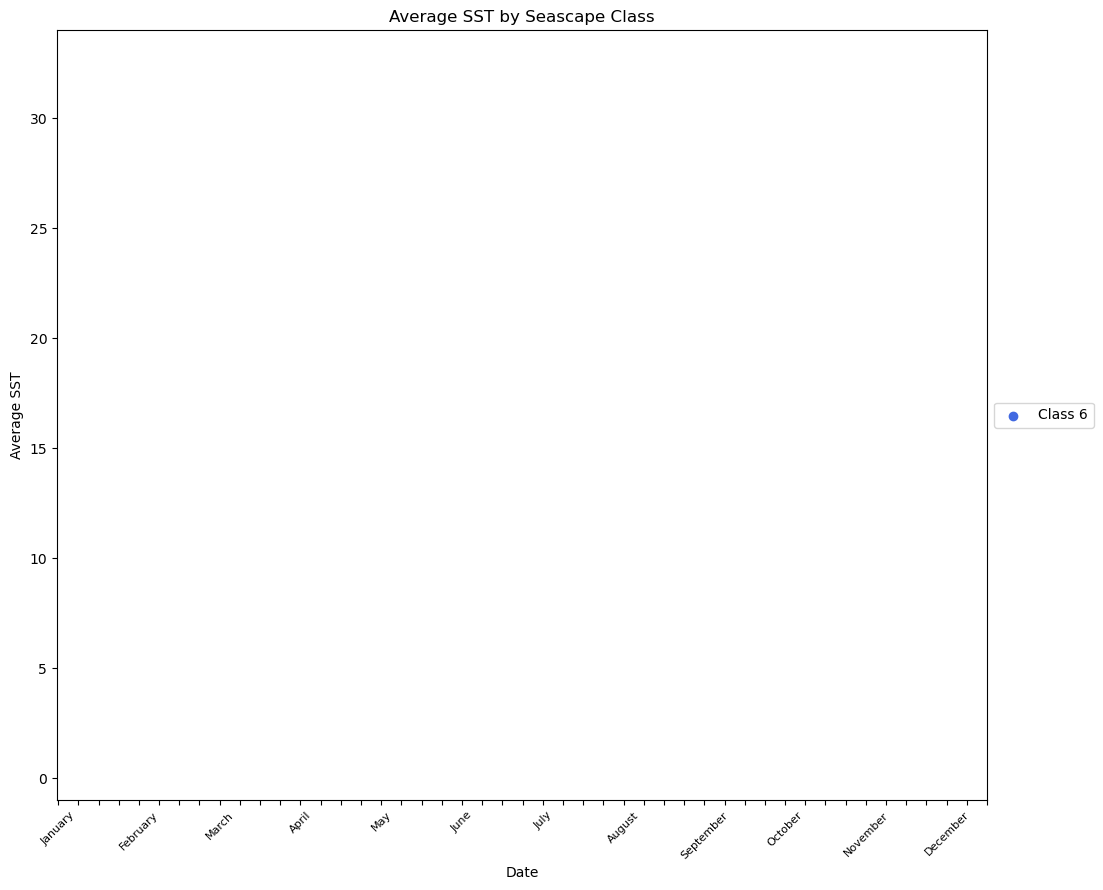

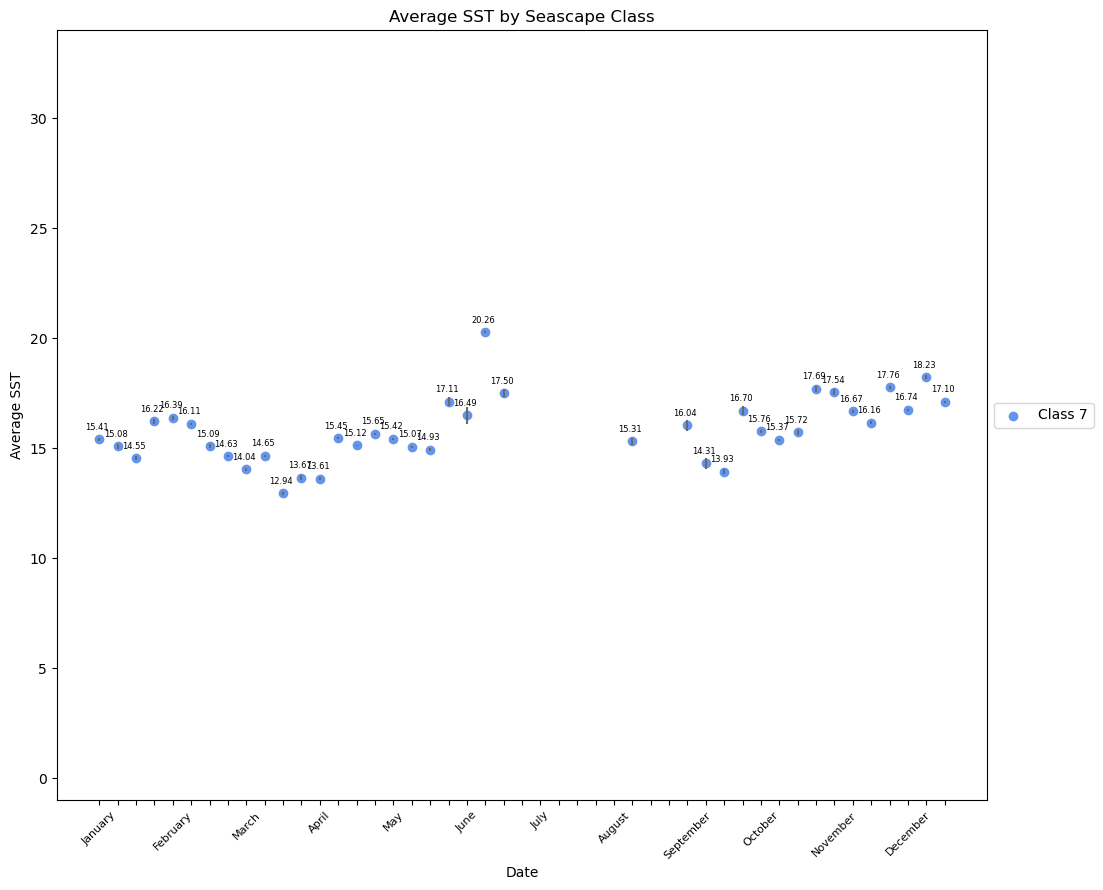

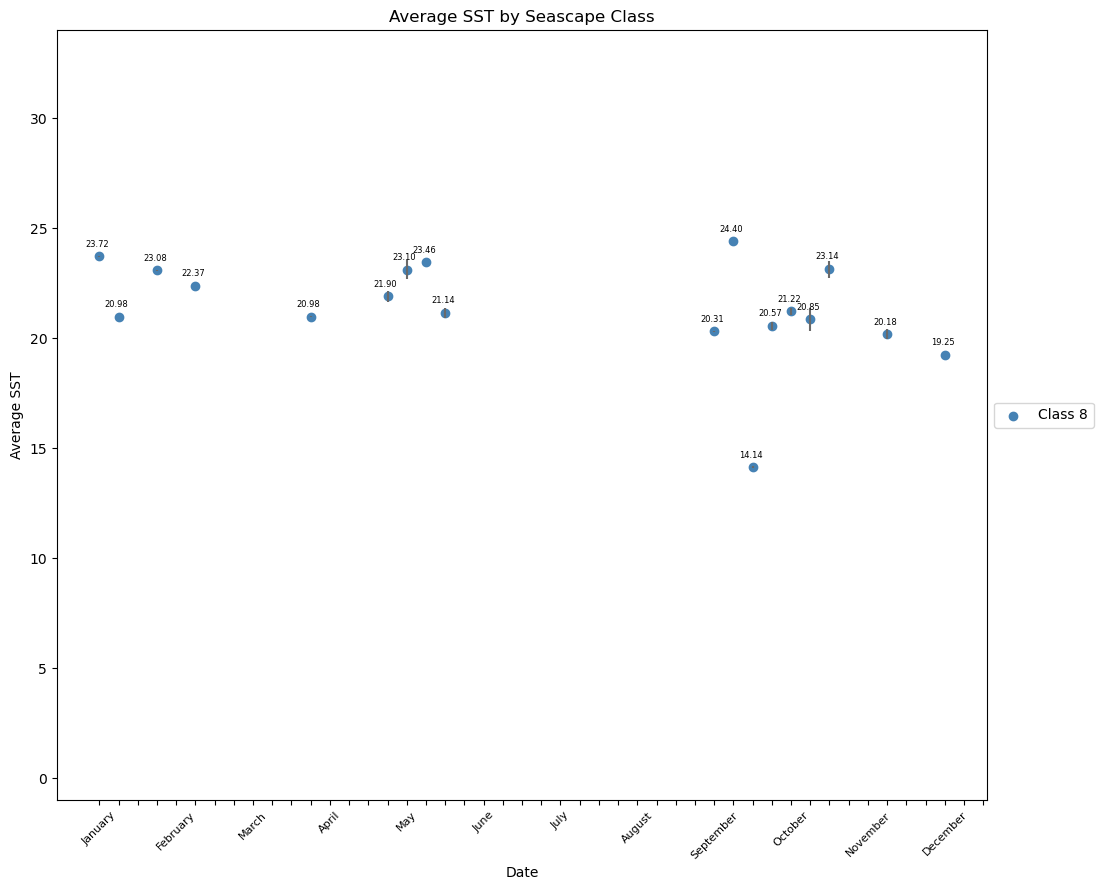

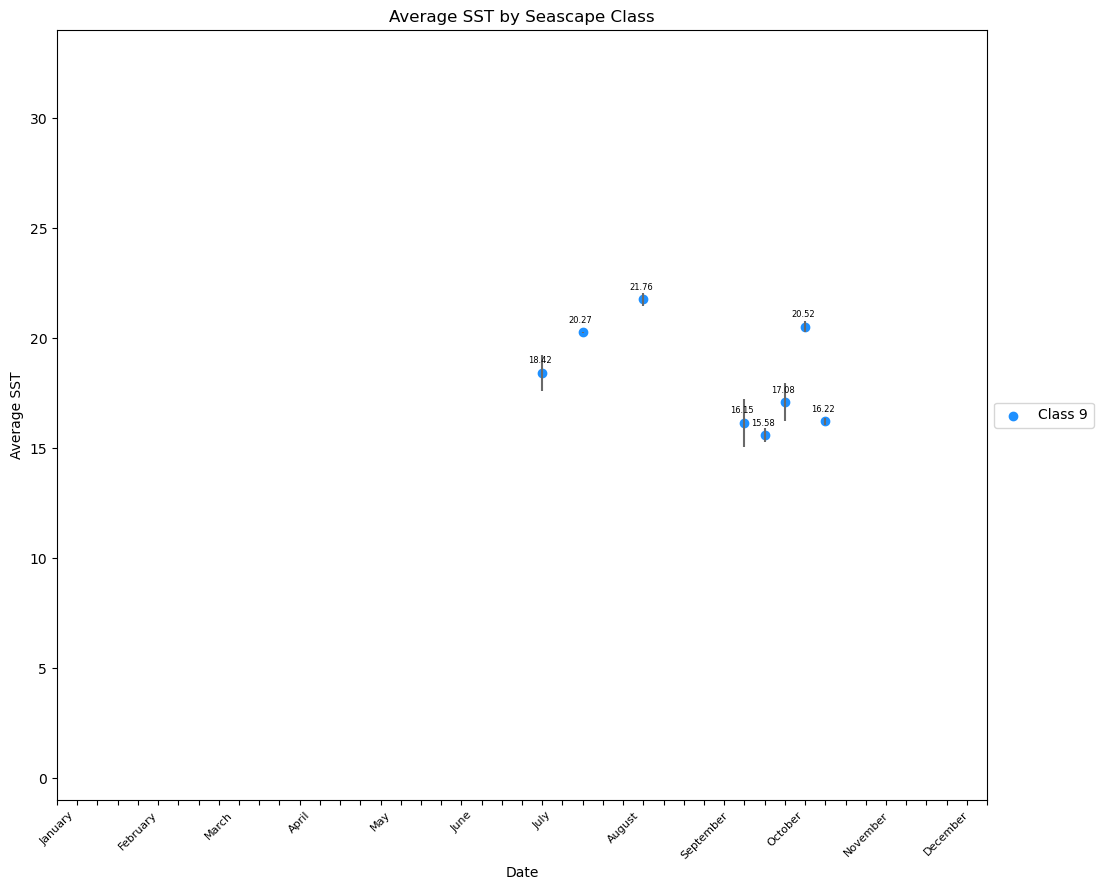

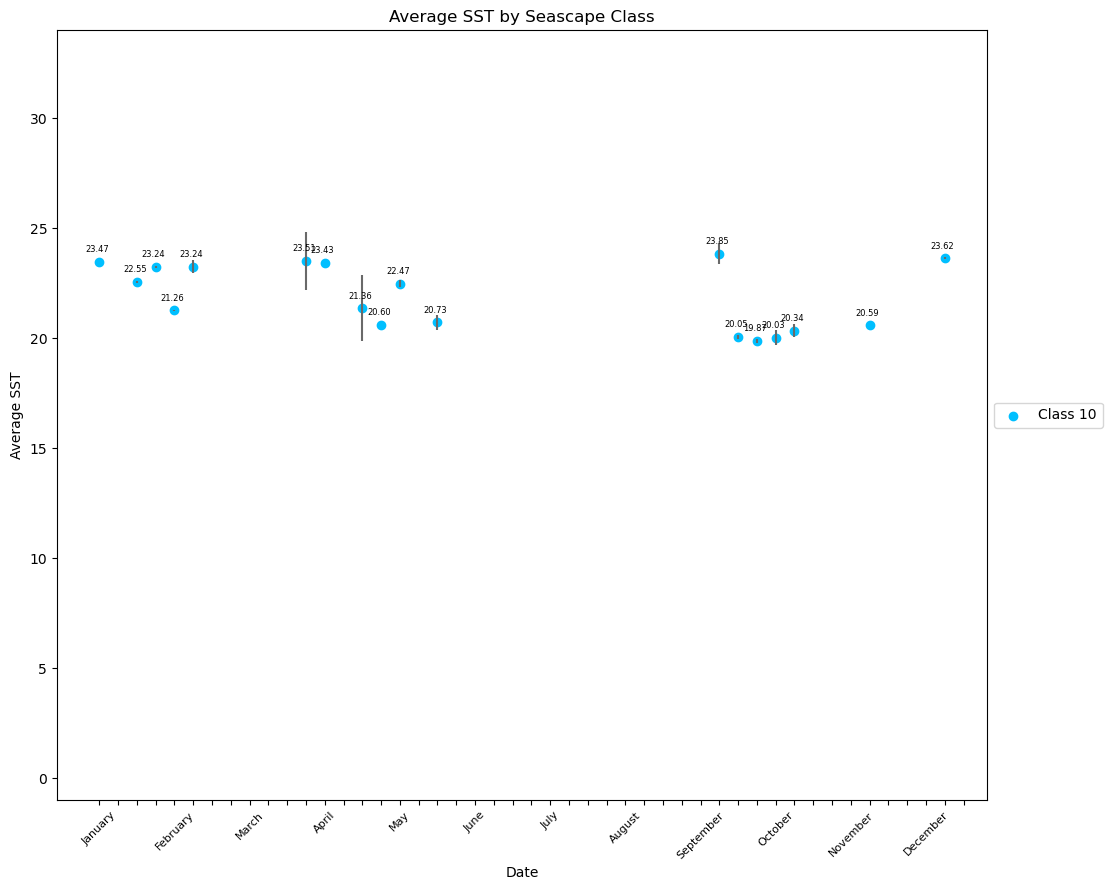

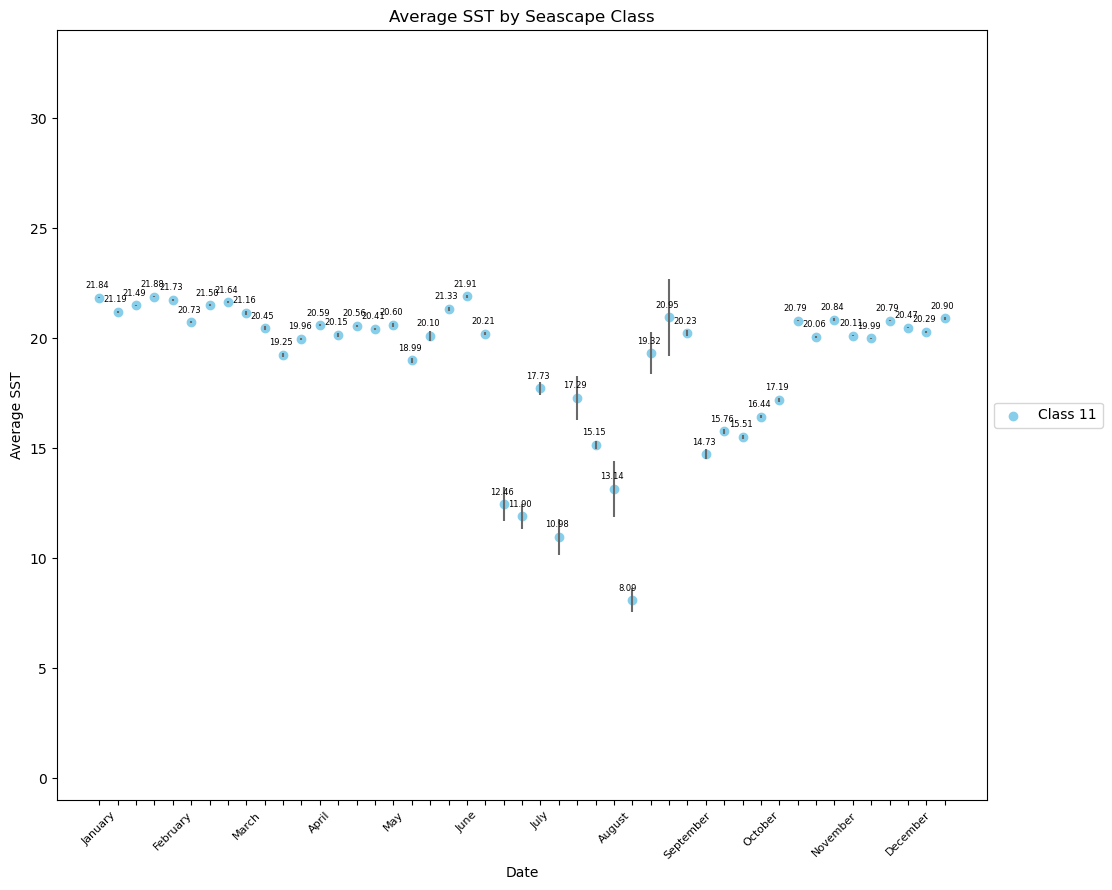

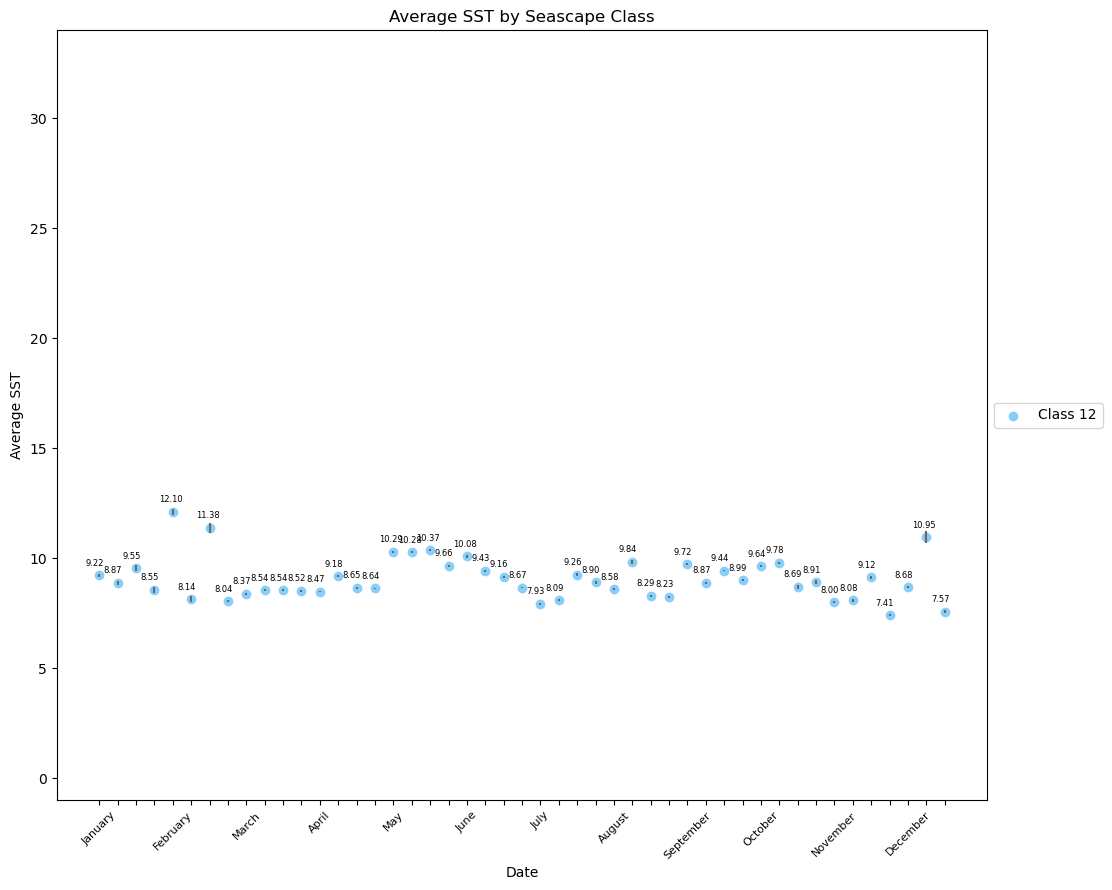

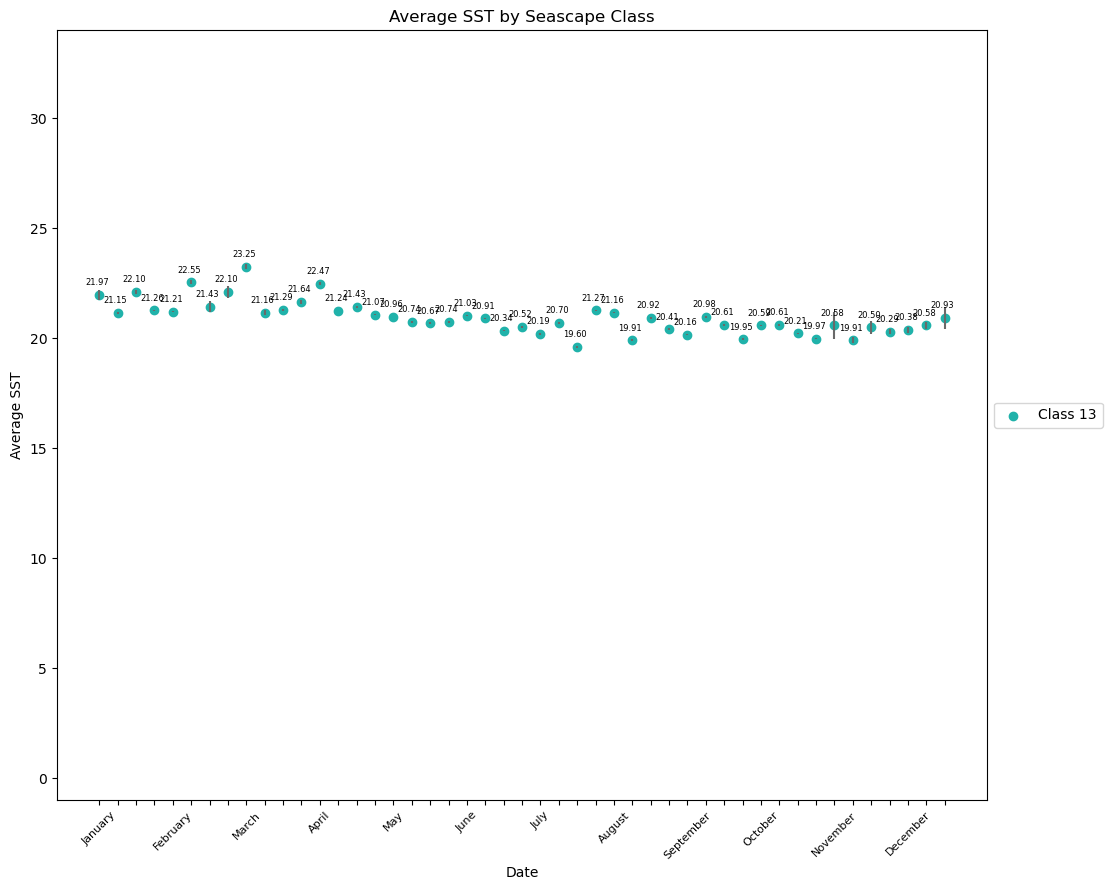

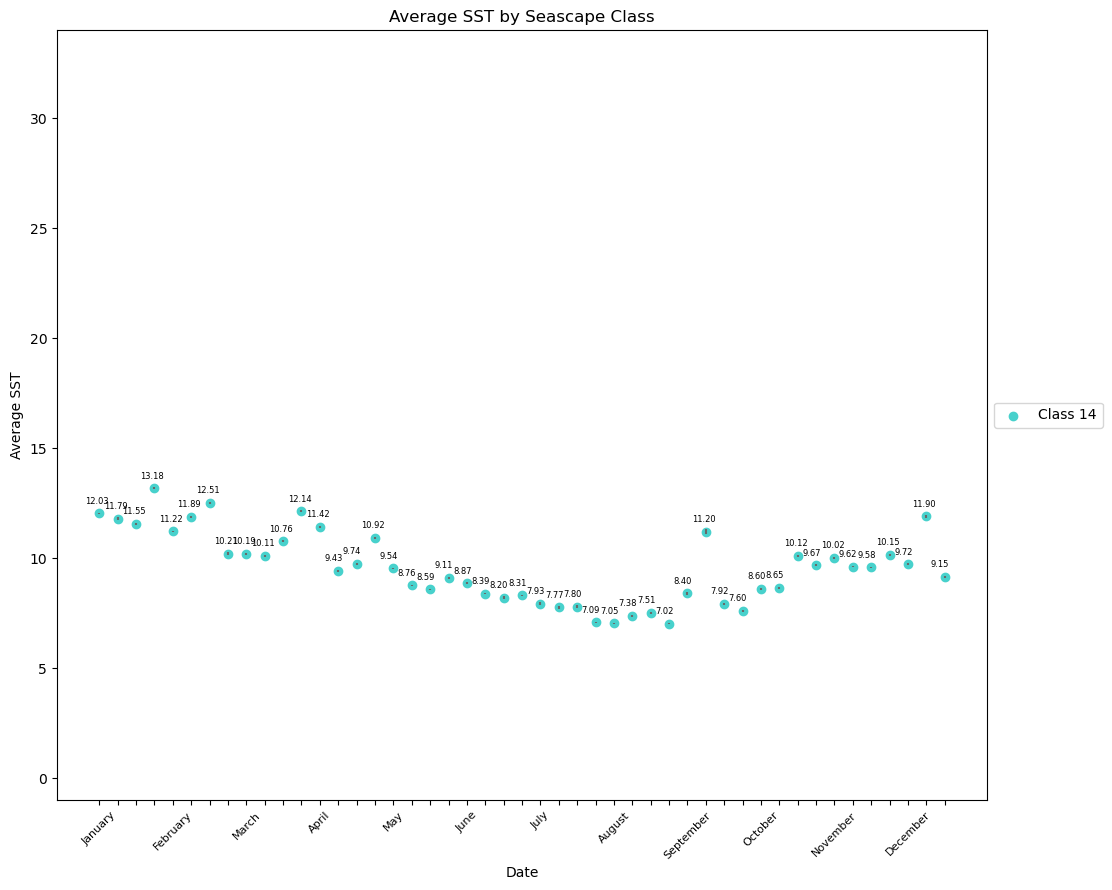

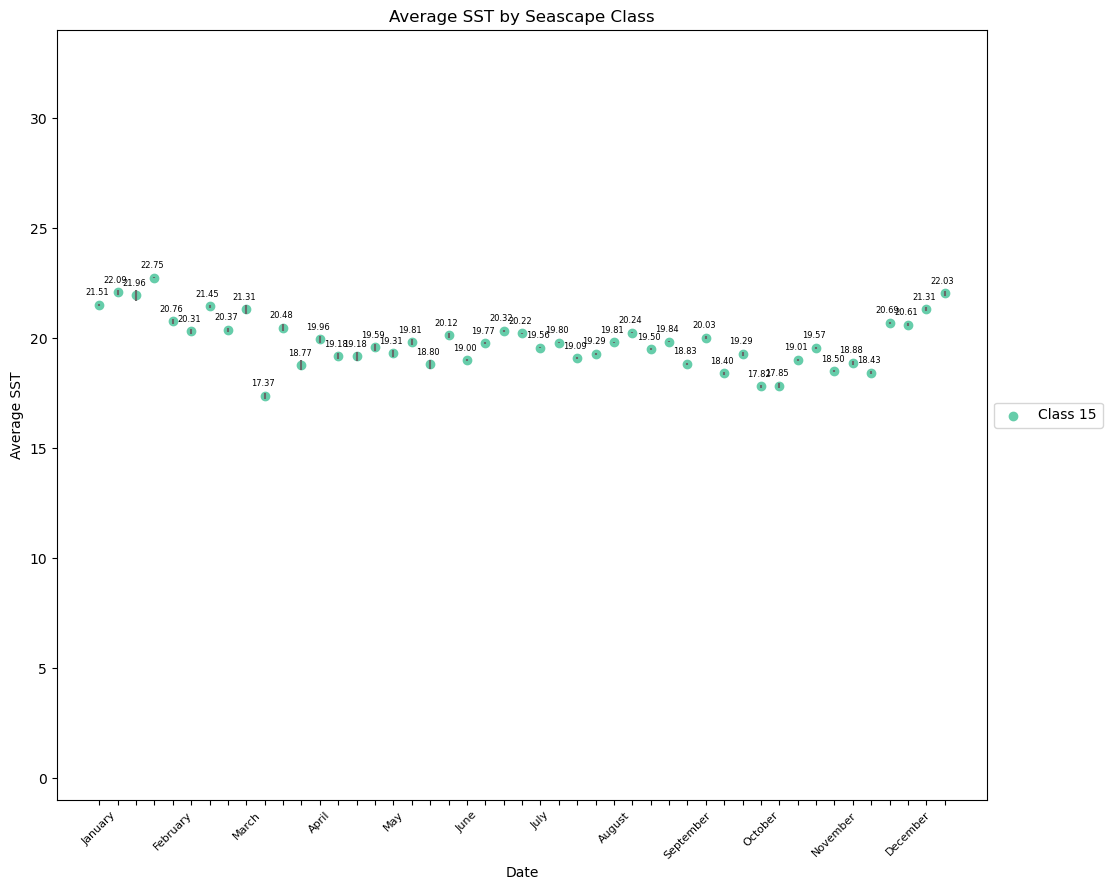

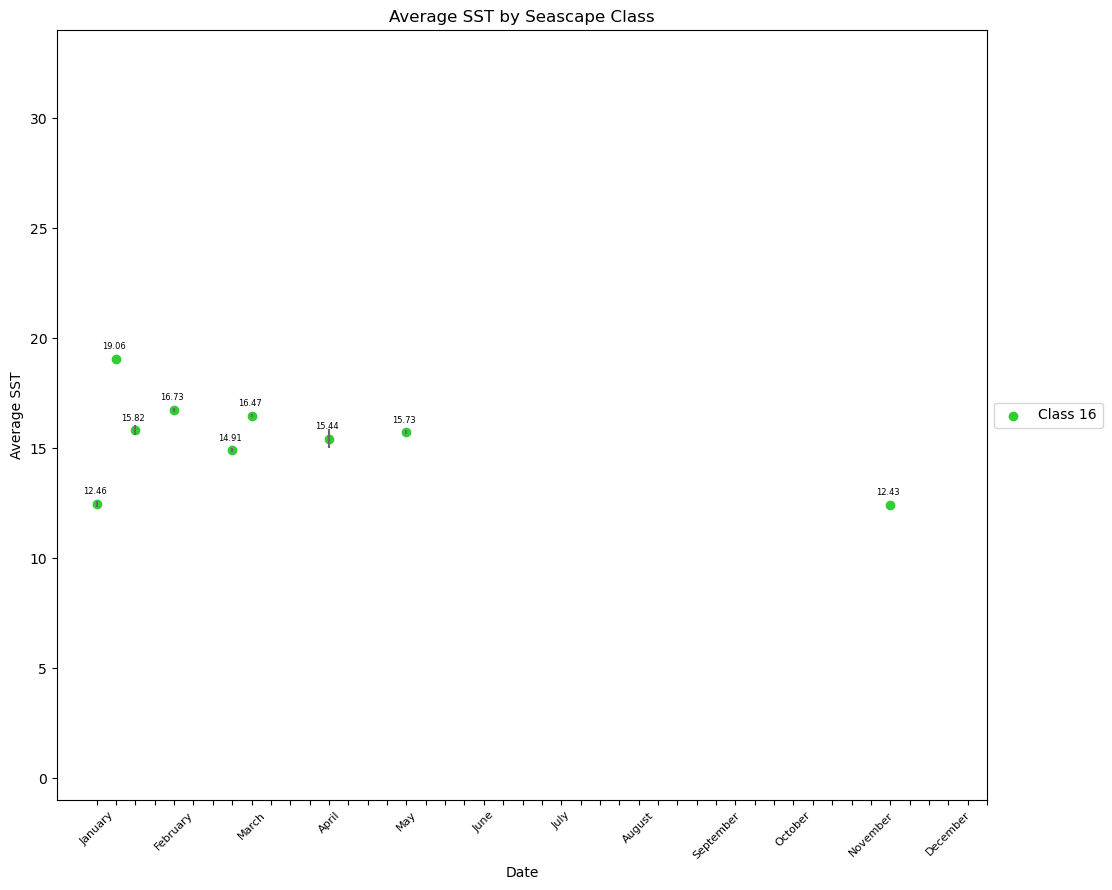

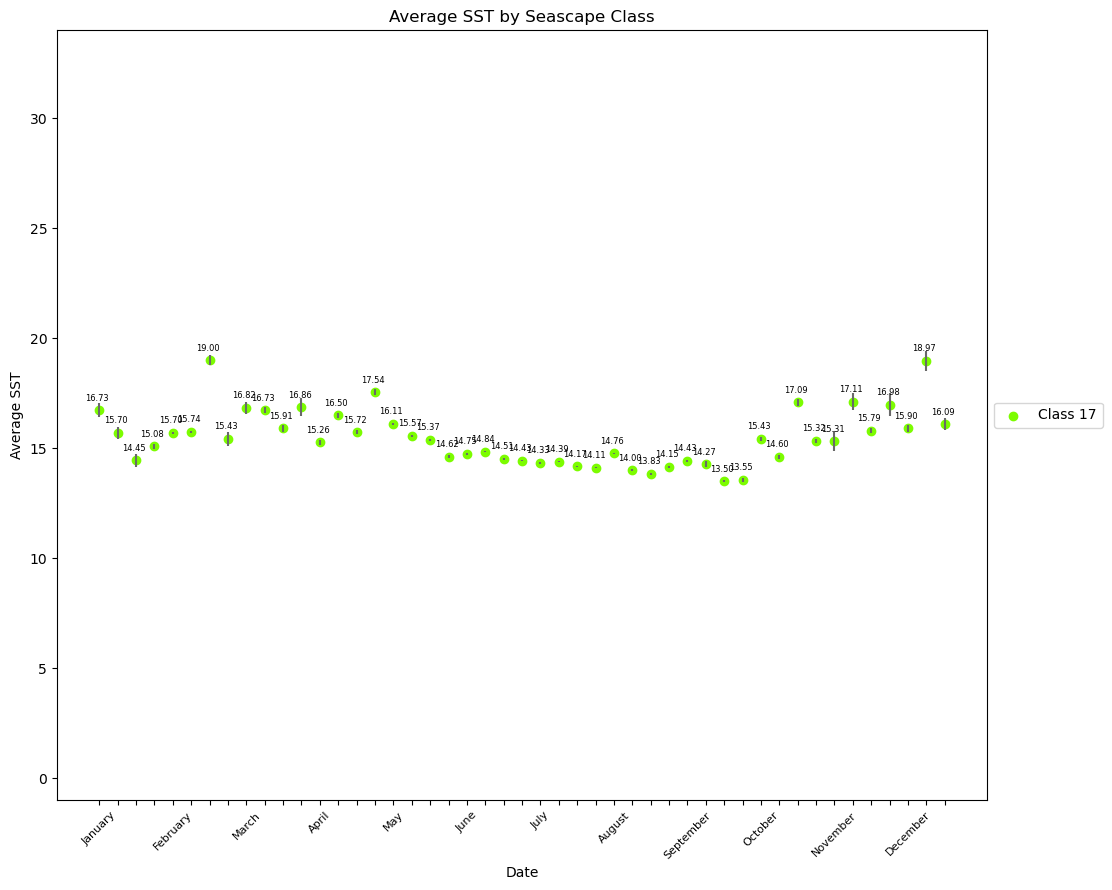

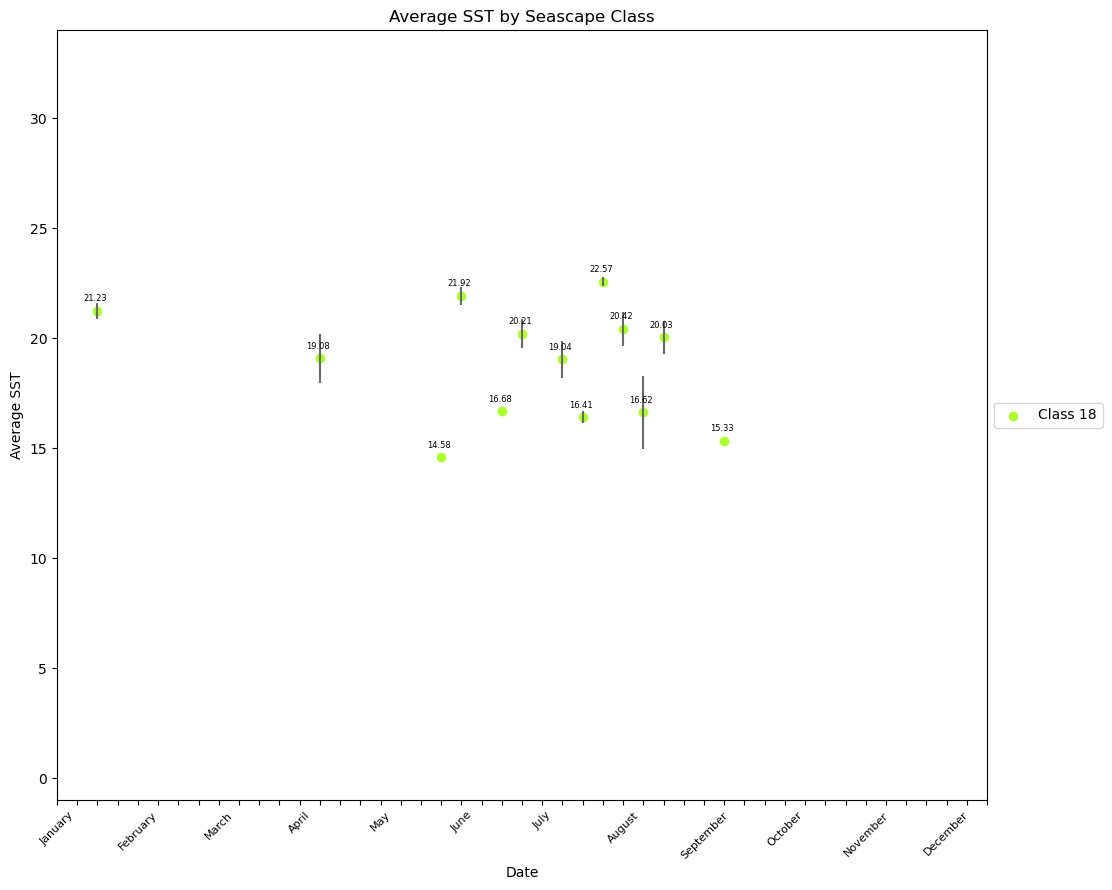

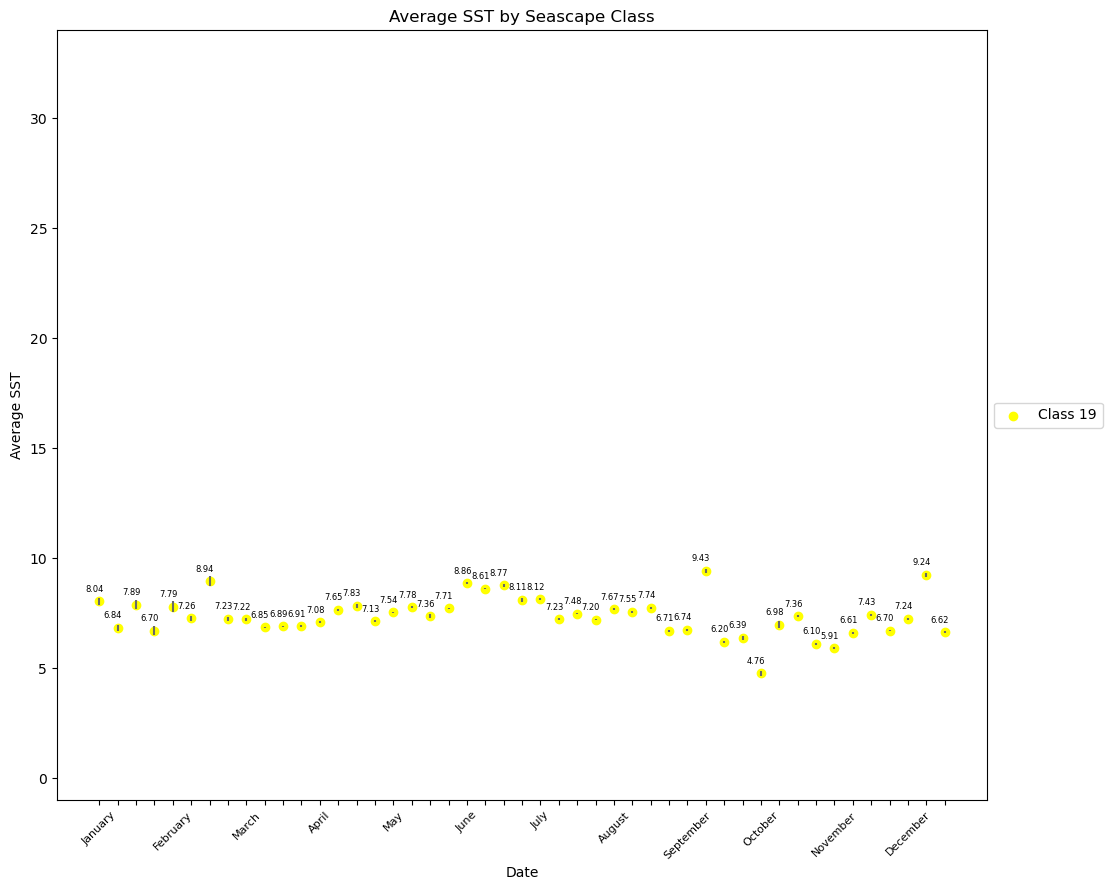

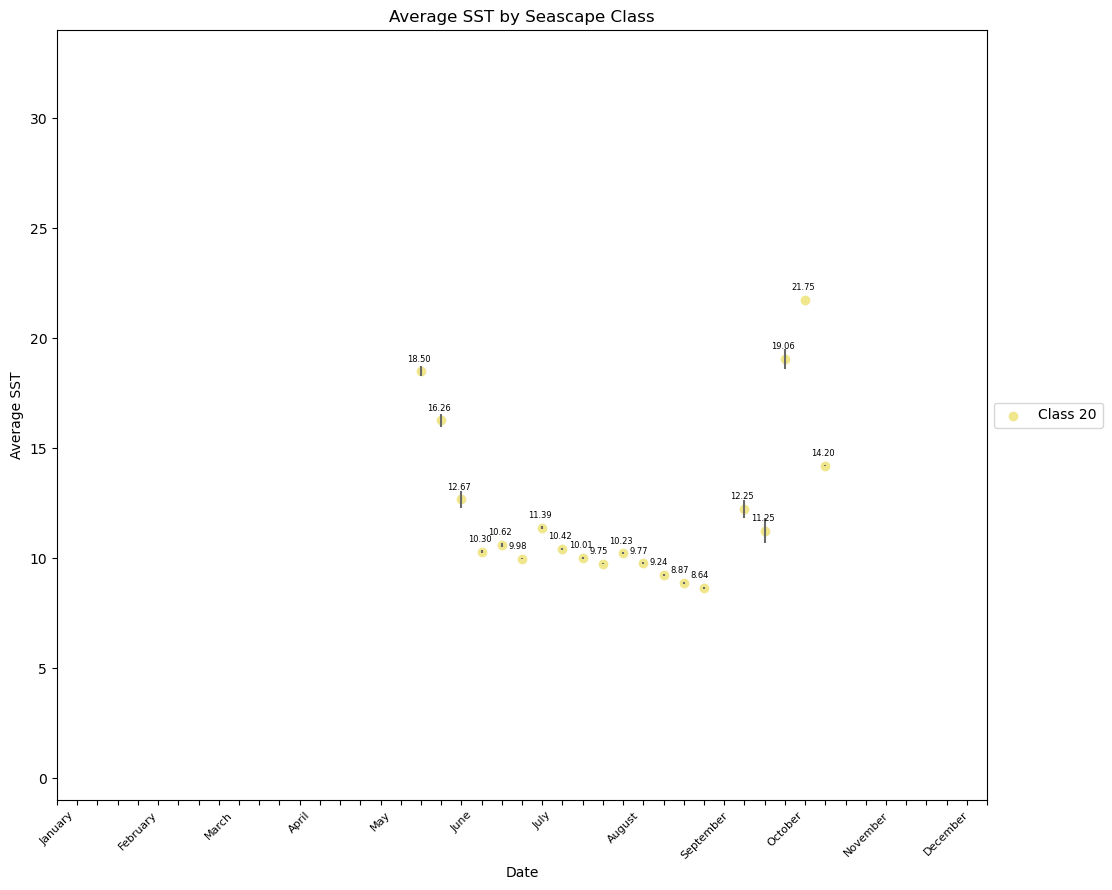

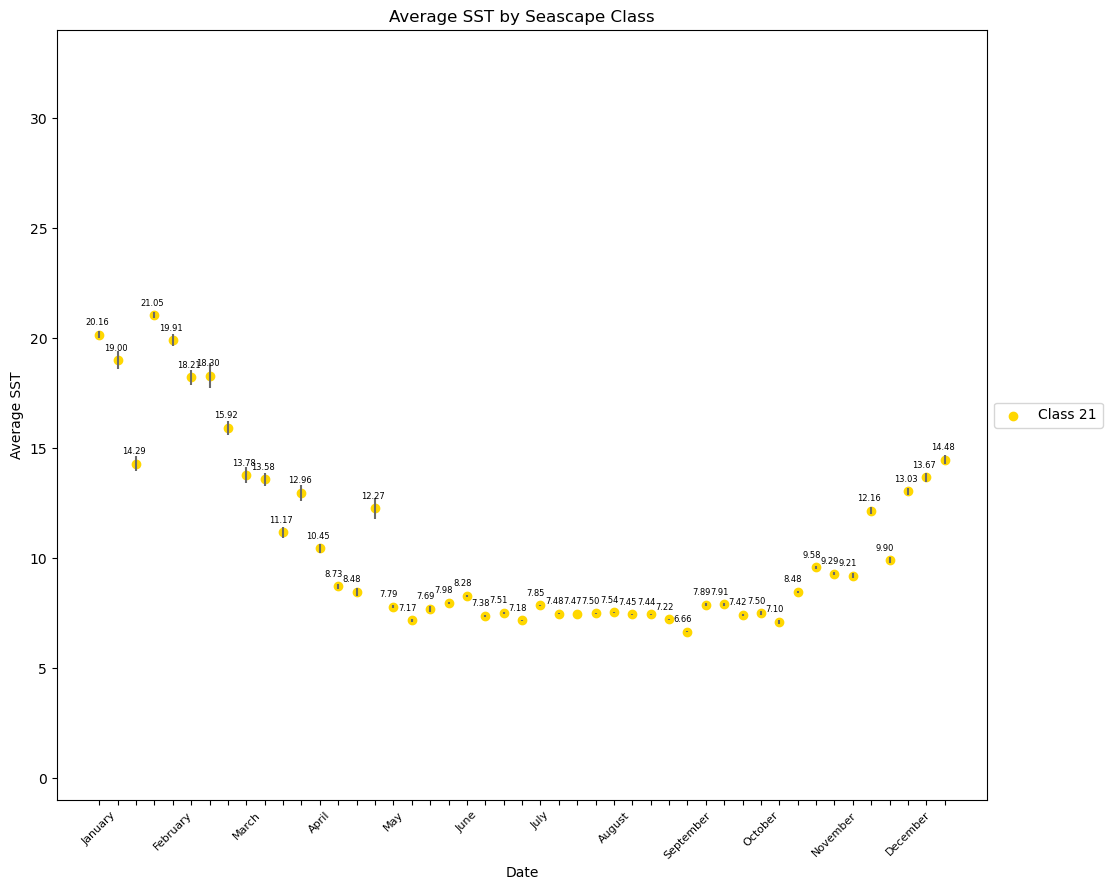

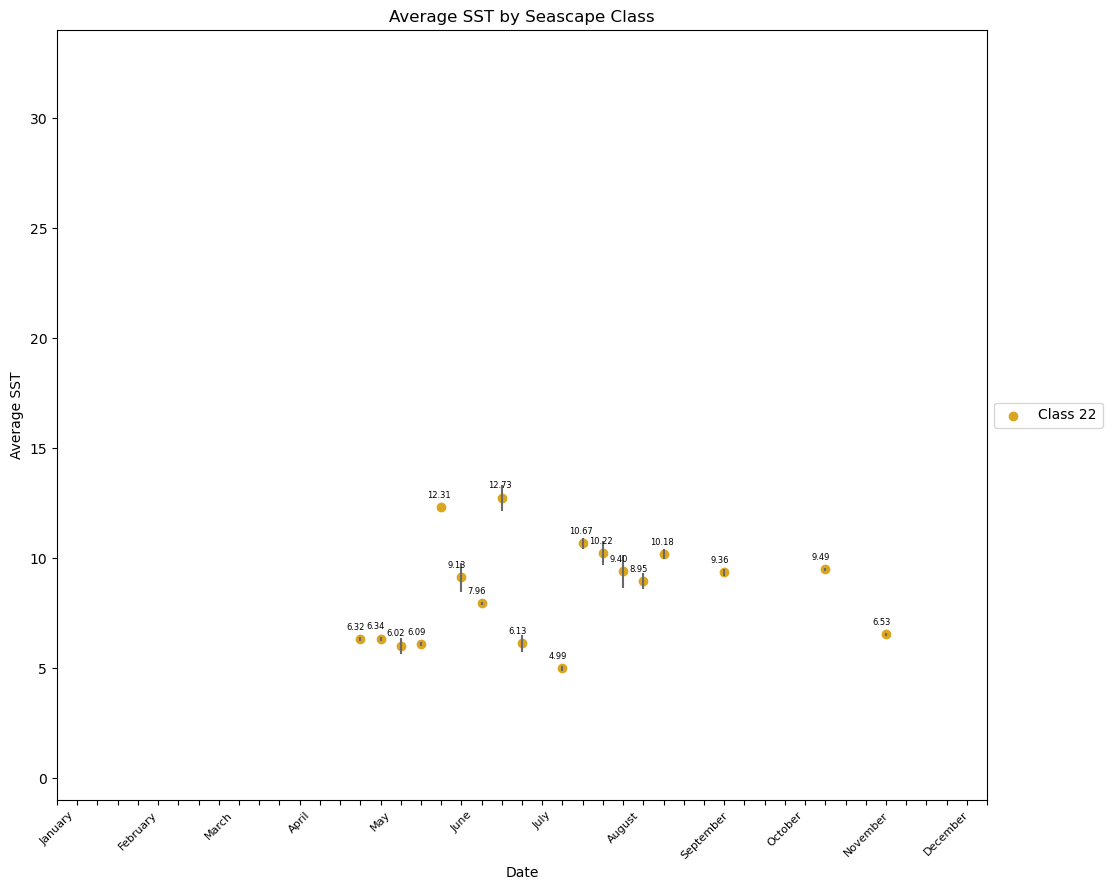

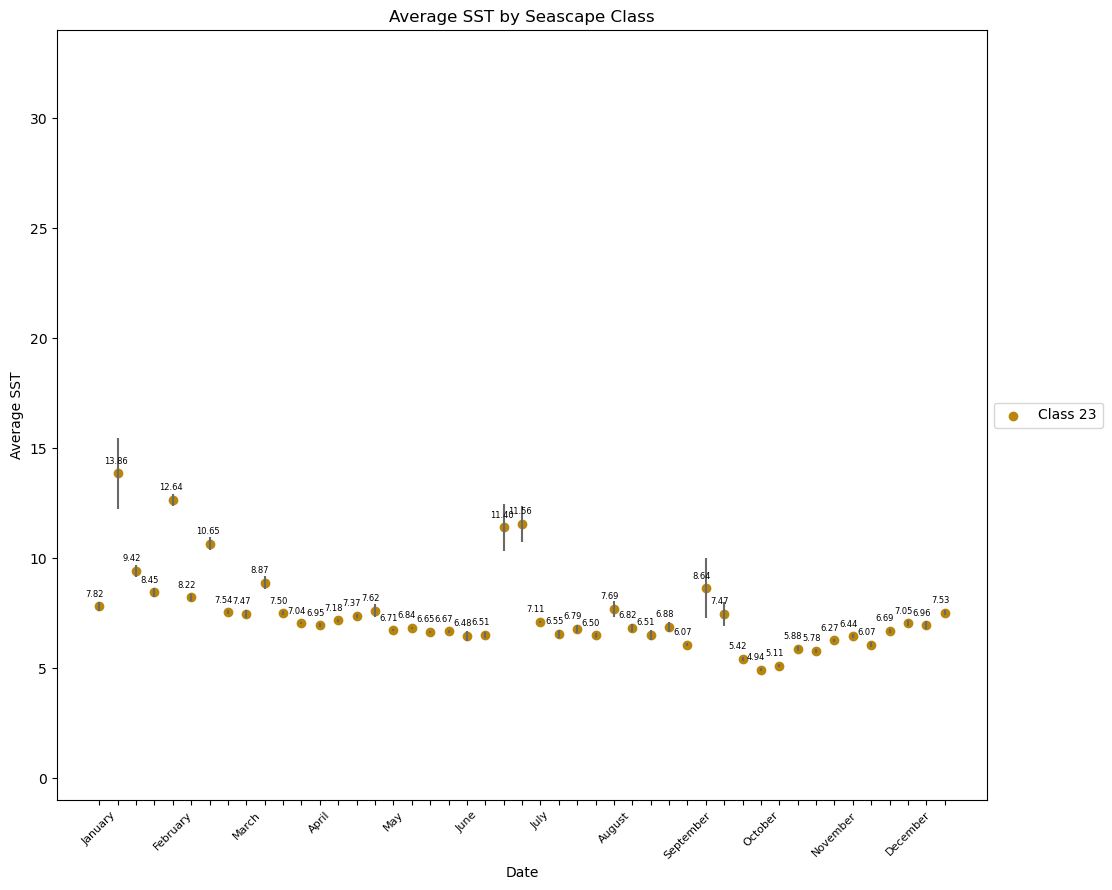

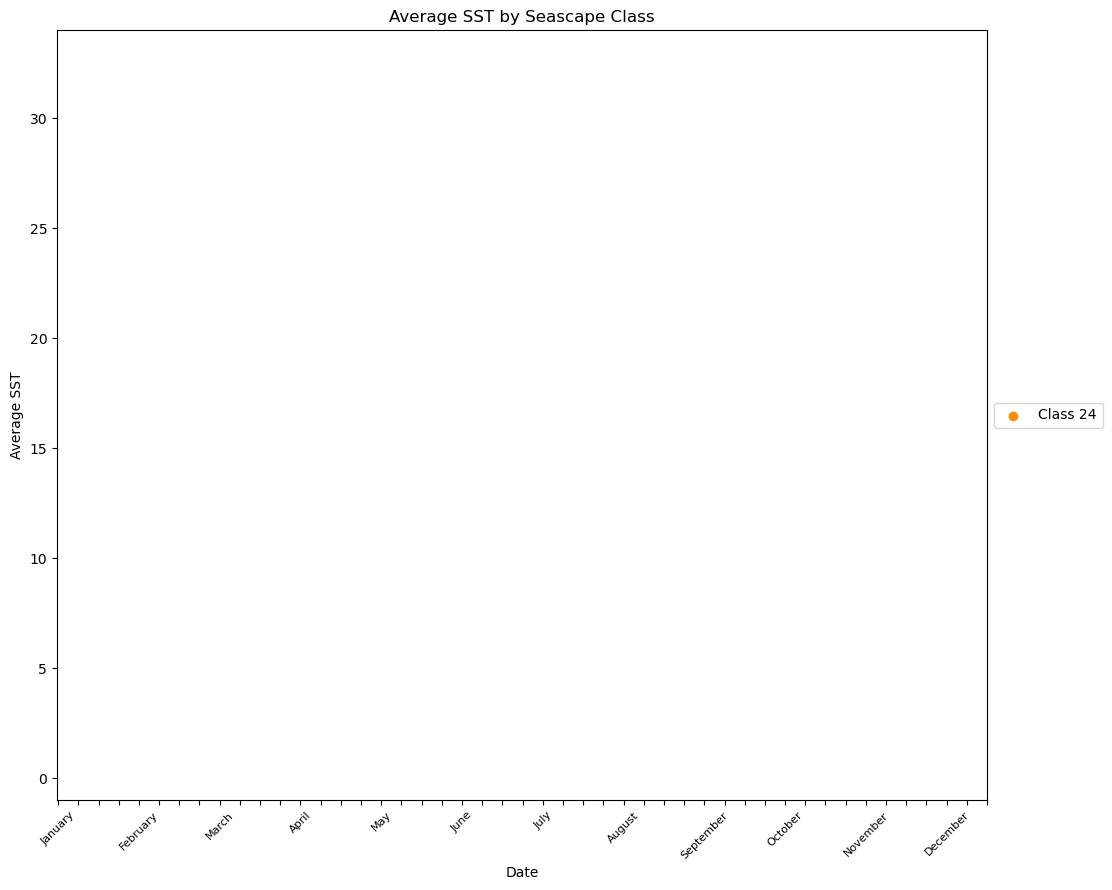

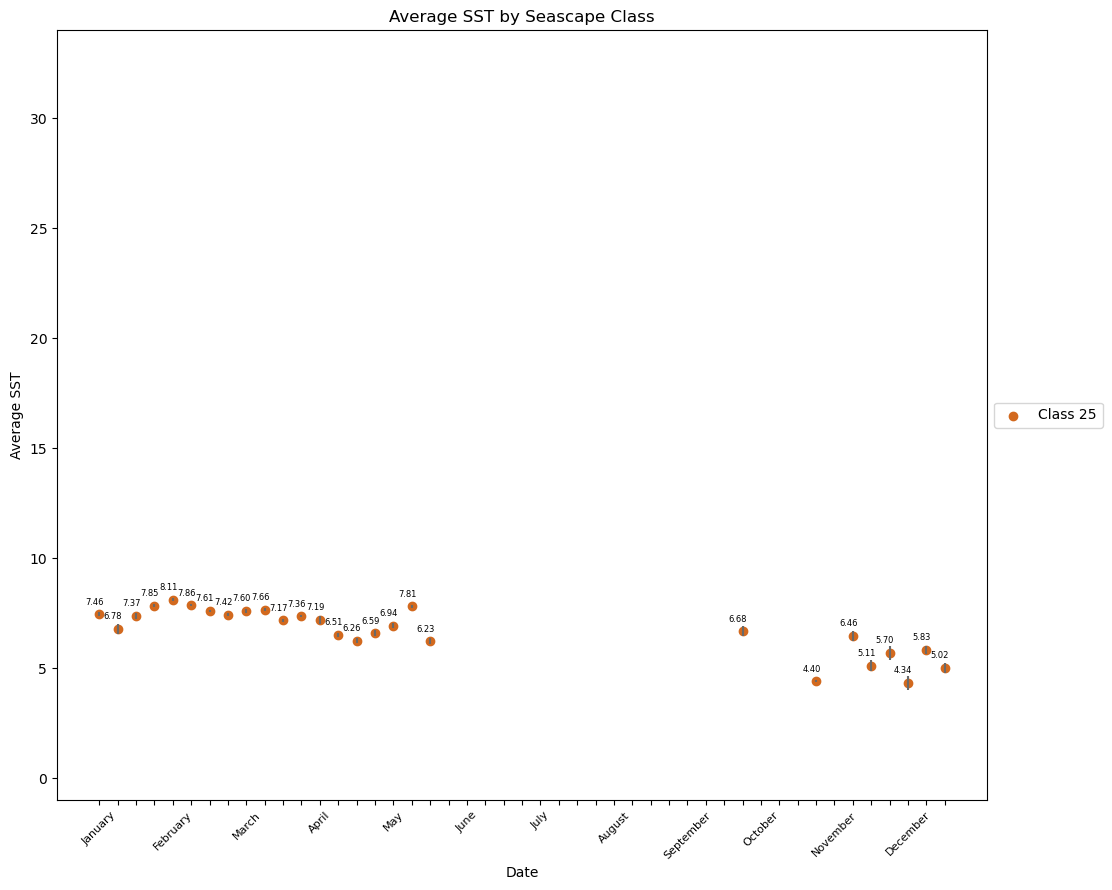

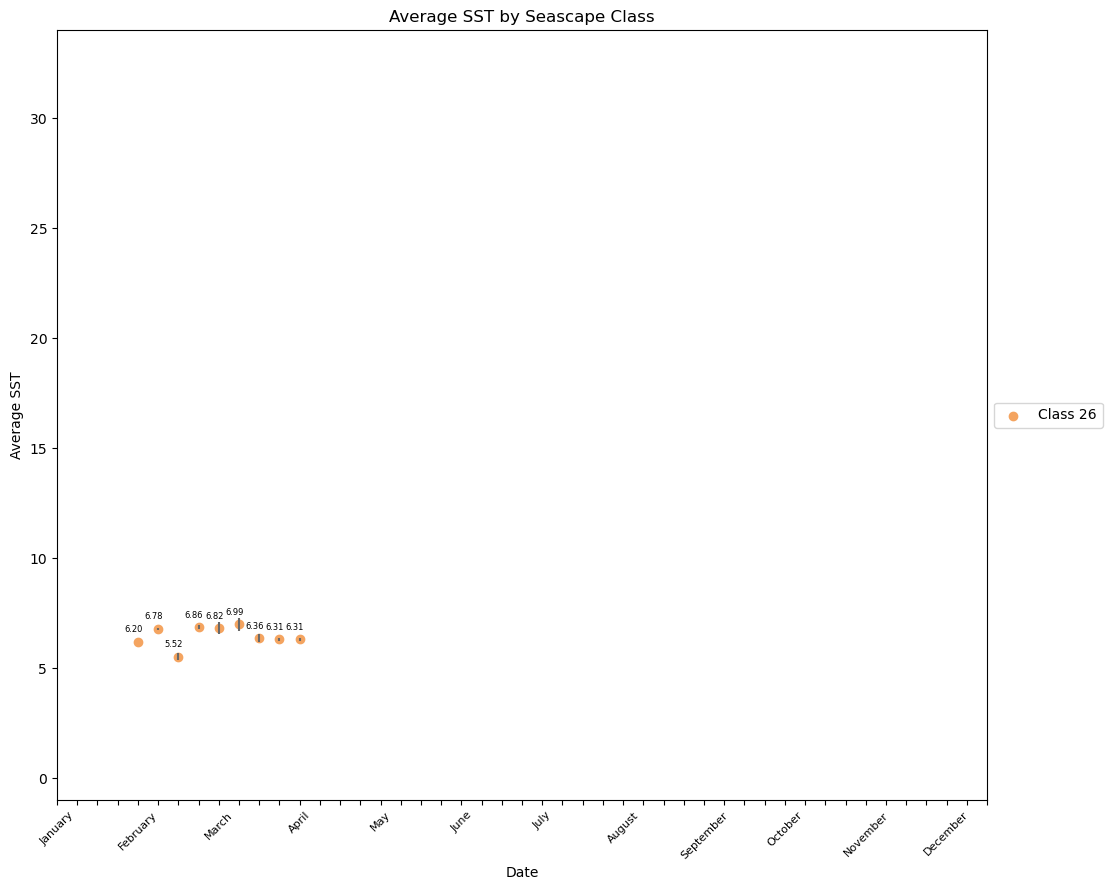

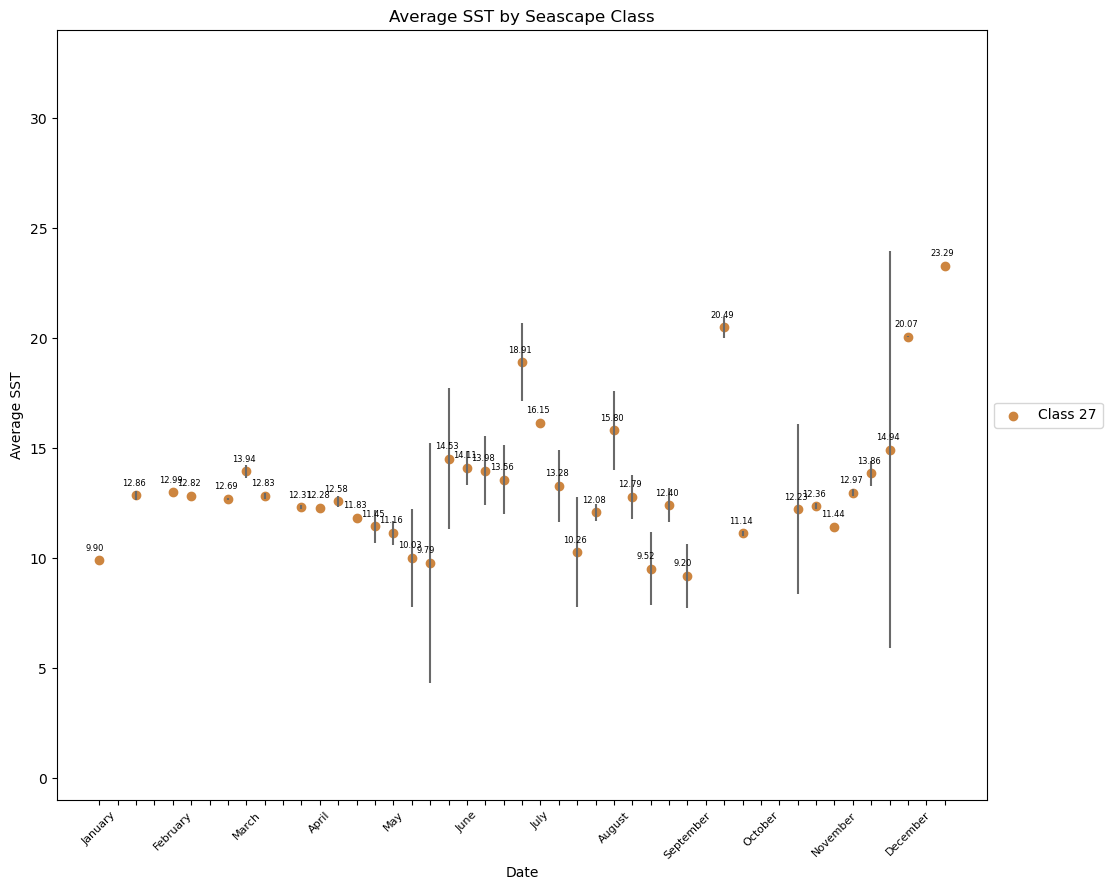

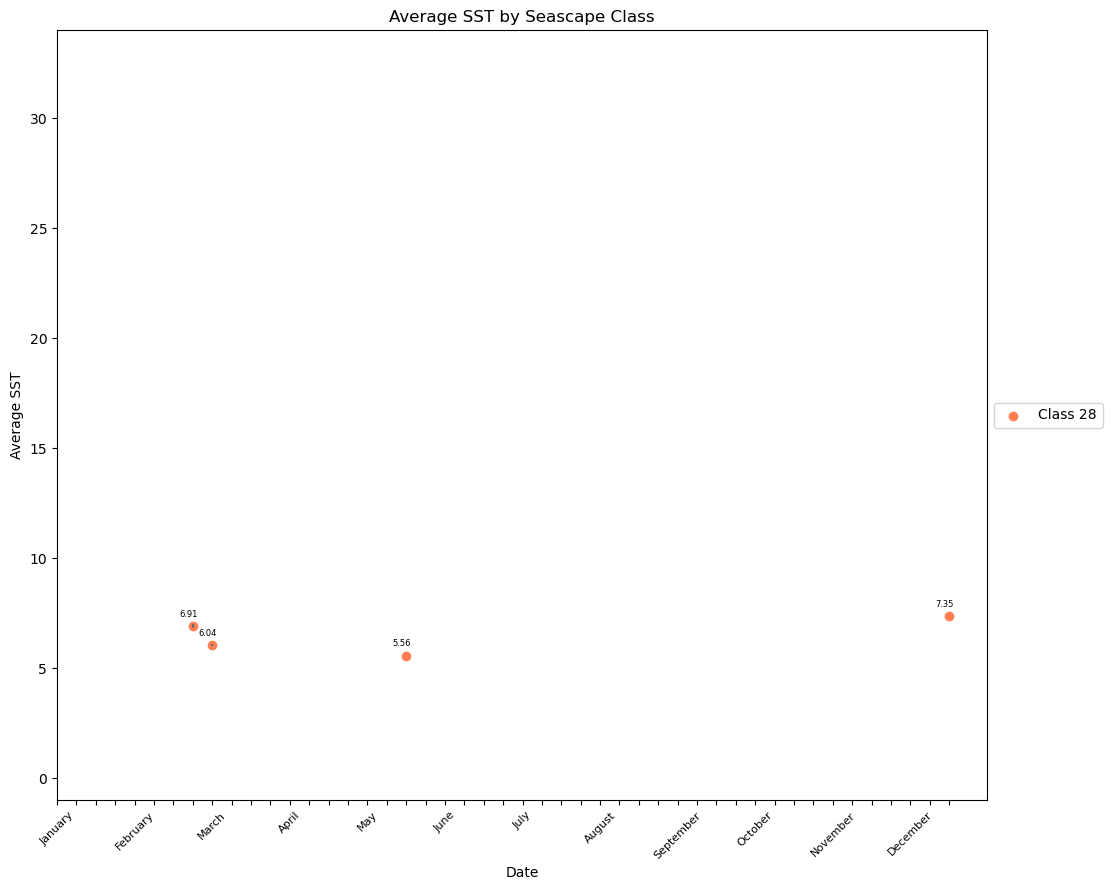

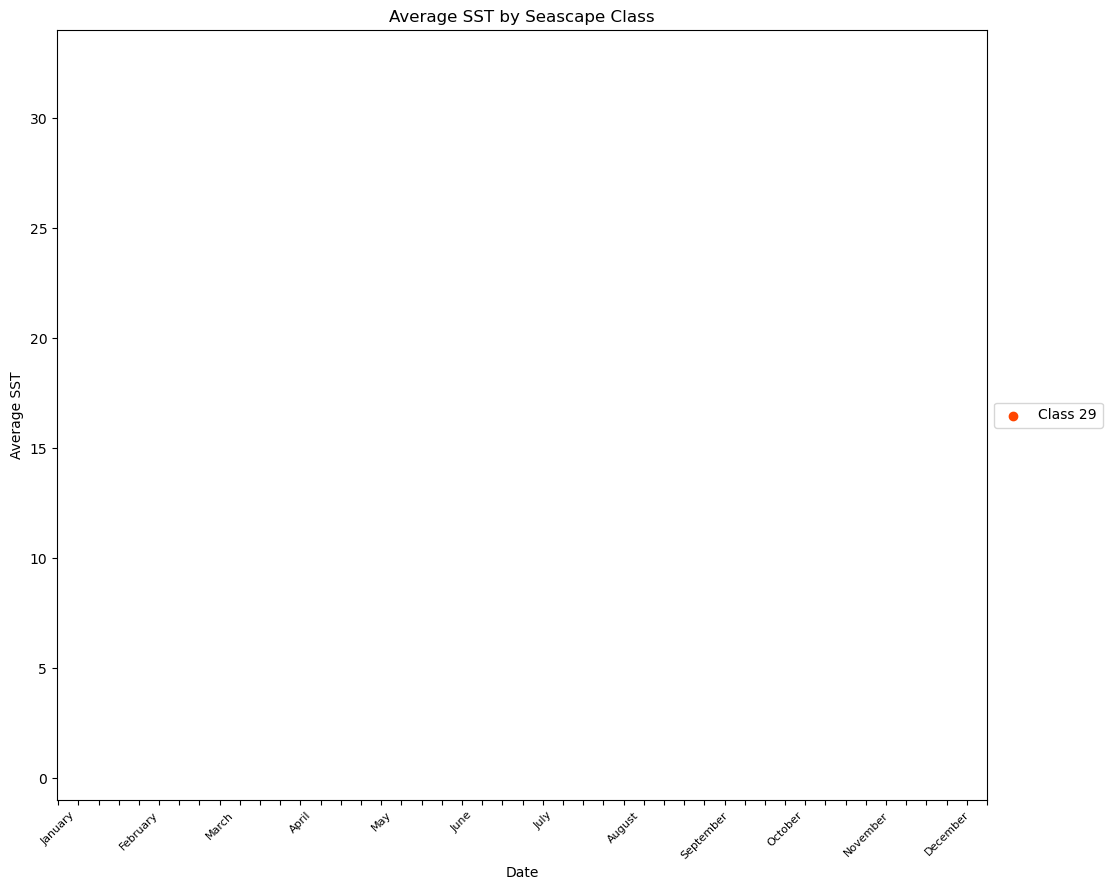

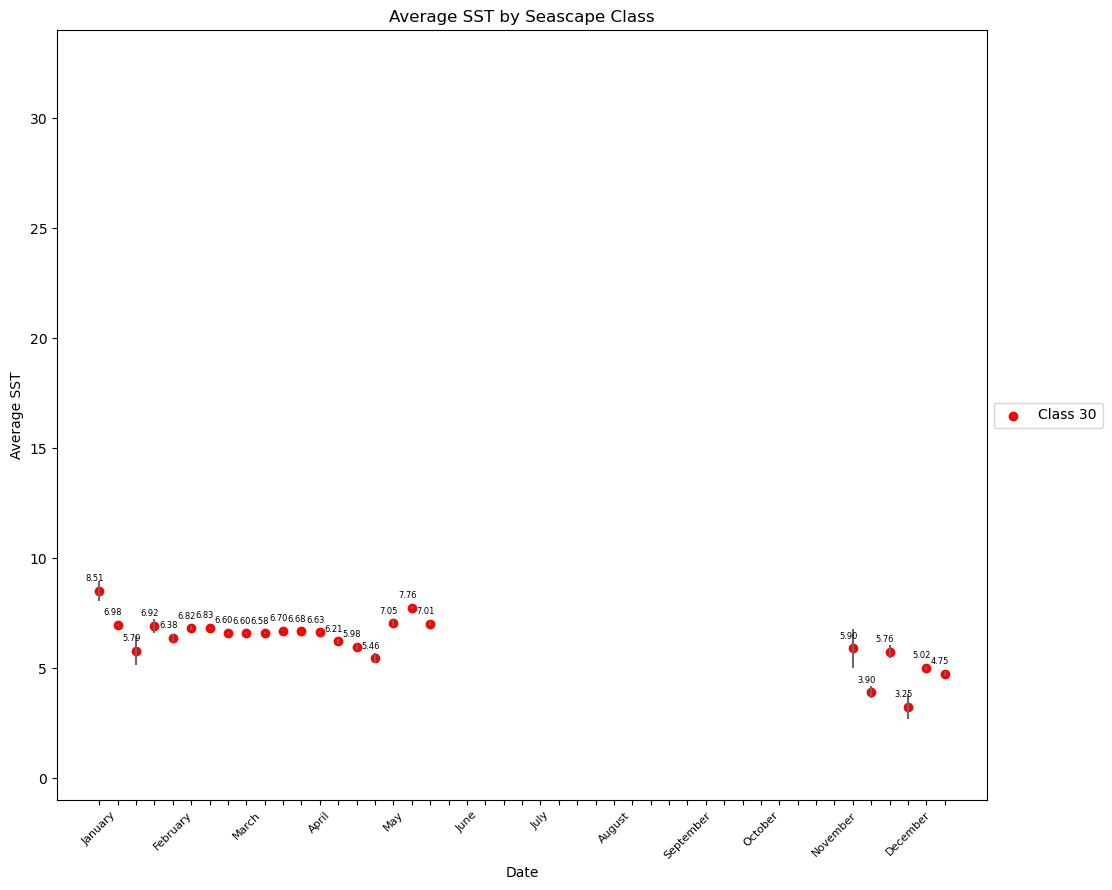

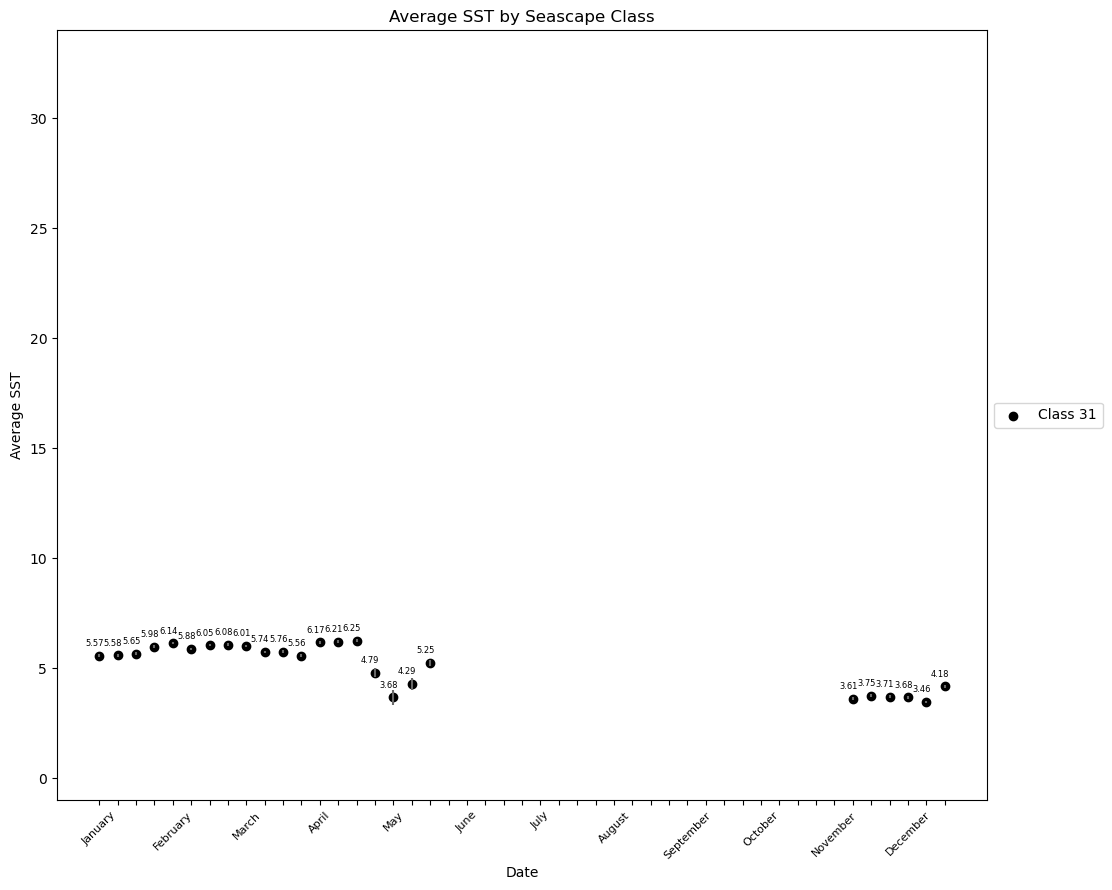

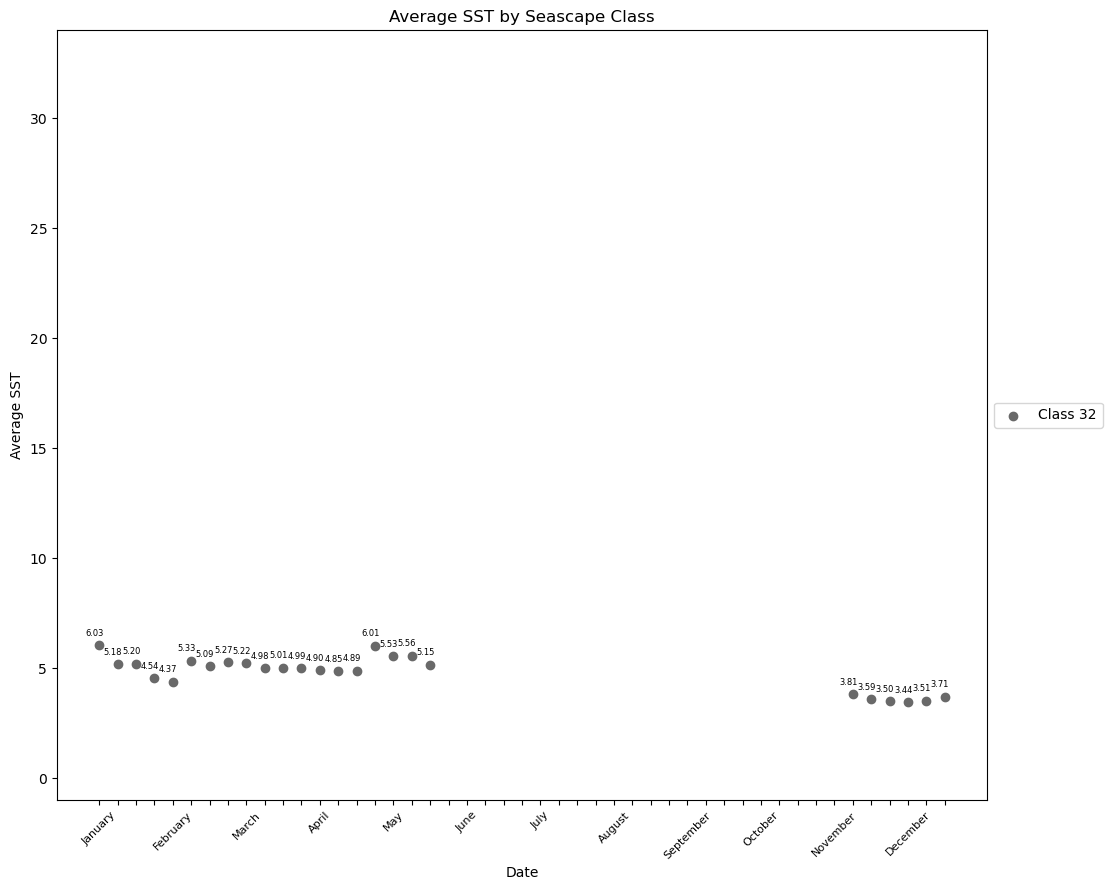

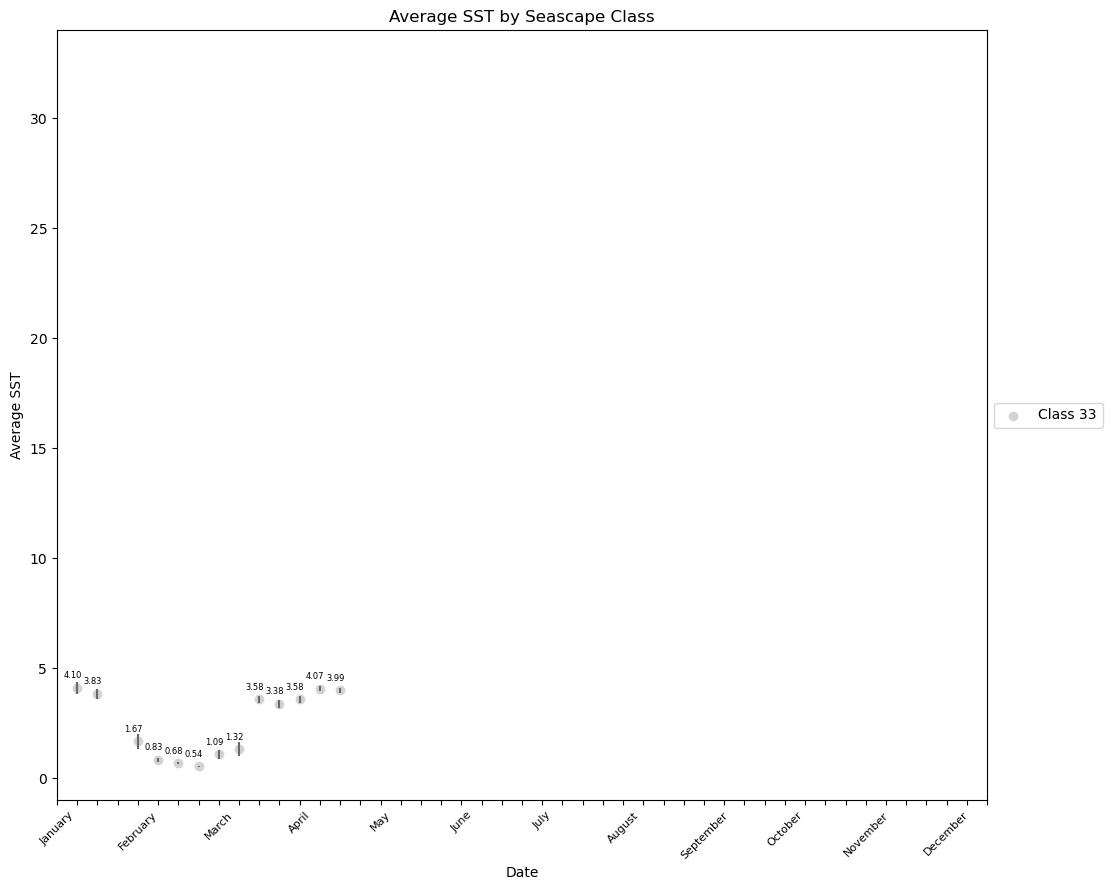

In [33]:
colors = ["midnightblue","navy","darkblue","mediumblue", "blue", "royalblue", 'cornflowerblue','steelblue','dodgerblue','deepskyblue','skyblue','lightskyblue','lightseagreen','mediumturquoise','mediumaquamarine','limegreen','lawngreen','greenyellow','yellow',
         'khaki','gold','goldenrod','darkgoldenrod','darkorange', 'chocolate','sandybrown','peru','coral','orangered','red','black','dimgrey', 'lightgray']


for x in range(1,34):
    fig = plt.figure(figsize=(12, 10)) #set figure size
    plt.scatter(xi, averages[x], label= 'Class' + ' ' + str(x), color = colors[x-1])
    plt.errorbar(xi,averages[x], yerr= std_err[x], color = 'dimgrey', ls='none')
    plt.title('Average SST by Seascape Class')
    plt.ylabel('Average SST')
    plt.xlabel('Date')
    plt.tick_params(axis='x', labelsize=10) #change date tick label size
    plt.xticks(xi, month, rotation=45, fontsize=8) #add correct labels
    plt.ylim(-1, 34)
    #plt.minorticks_on()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))#add legend
    labels = []
    for i in range(len(xi)): 
        if i % 4 == 0: 
            labels.append(month[i])
        else: 
            labels.append("")

    plt.xticks(ticks=xi,labels=labels)
   
    for i in range(len(xi)):
        plt.annotate(f'{averages[x][i]:.2f}', (xi[i],averages[x][i]), fontsize=6, xycoords='data',
                xytext=(-10, 7), textcoords='offset points')


plt.show()

TypeError: Dimensions of C (364, 240, 283) should be one smaller than X(283) and Y(240) while using shading='flat' see help(pcolormesh)

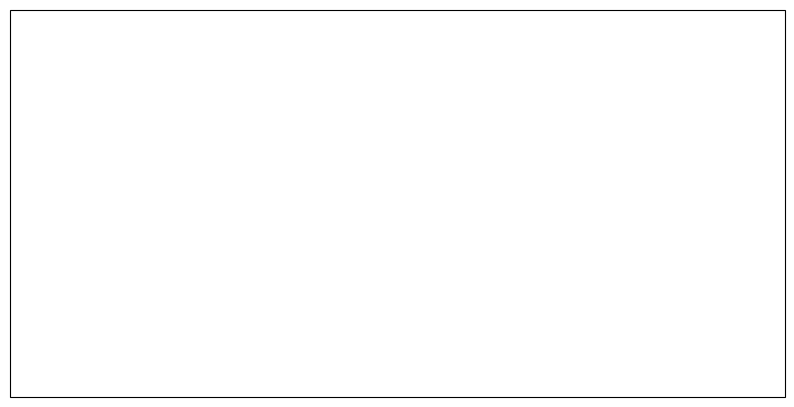

In [48]:
jet = ["blue", "#007FFF", "cyan", "#7FFF7F",
       "yellow", "#FF7F00", "red", "#7F0000"]

from matplotlib import colors as c

start_date = '2023-04-07' #(yyyy-mm-dd format)
end_date = '2023-08-29'

for x in range(num_files):
    fig = plt.figure(figsize=(10, 7)) #set figure size
    map_projection = cartopy.crs.PlateCarree() #set map projection
    ax = plt.axes(projection=map_projection) 
    
    cm = LinearSegmentedColormap.from_list('my_jet', jet, N=33) #call colormap
    im = ax.pcolormesh(seascapes.longitude, seascapes.latitude, ds_source.sea_surface_temperature, cmap = cm, vmin=0, vmax=33) #set variables to plot
    ax.coastlines()
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.feature as cfeature
    import cartopy.crs as ccrs
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    from shapely.ops import cascaded_union
    bathym = cfeature.NaturalEarthFeature(name='bathymetry_K_200', scale='10m', category='physical')
    bathym = cascaded_union(list(bathym.geometries()))
    ax.add_geometries(bathym, facecolor='none', edgecolor='black', crs=ccrs.PlateCarree())
    
    ax.set_xticks(np.linspace(-78, -63.4, 5), crs=map_projection) #set latitude bounds 
    ax.set_yticks(np.linspace(34.3, 47, 5), crs=map_projection) #set longitude bounds
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    
    cb = plt.colorbar(im, label='Class number',) #colorbar title 
    tick_locator = ticker.MaxNLocator(nbins=33) #set 33 ticks to colorbar (one for each seascape class) 
    cb.locator = tick_locator
    cb.update_ticks()
    plt.title('Average SST by Seascape Classes ' +str(seascapes.time[x].dt.strftime('%Y-%m-%d').item()))